In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib
import sklearn

# Reading in the data

In [235]:
# import the data 
# spurs 1 & 2 data
spurs1 = pd.read_csv('spurs1_data.csv')
spurs2 = pd.read_csv('spurs2_data.csv')
spurs1.head(5)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
0,735126.854167,37.768,27.887,0.0,3.1715,-70.403,NaN,NaN
1,735126.895833,37.767,27.794,0.0,3.5116,-78.652,NaN,NaN
2,735126.937500,37.768,27.718,0.0,4.8705,-86.660,0.0,NaN
3,735126.979167,37.769,27.651,0.0,4.5117,-89.874,0.0,NaN
4,735127.020833,37.770,27.593,0.0,4.3185,-94.404,0.0,NaN


sss = sea surface salinity //
sst = sea surface temperature

In [236]:
# this is a helper function for converting the time number to datetime
from datetime import datetime, timedelta

def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    return datetime.fromordinal(int(datenum)) \
           + timedelta(days=days) \
           - timedelta(days=366)

In [237]:
# filtering out variables that we don't really care about
# spurs1
spurs1['datetime'] = spurs1['time'].apply(datenum_to_datetime)
spurs1 = spurs1.set_index('datetime')
spurs1 = spurs1.fillna(0)

# spurs2
spurs2['datetime'] = spurs2['time'].apply(datenum_to_datetime)
spurs2 = spurs2.set_index('datetime')
spurs2 = spurs2.fillna(0)

In [238]:
spurs1.head()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
datetime,,,,,,,,
2012-09-14 20:30:00.000027,735126.854167,37.768,27.887,0.0,3.1715,-70.403,0.0,0.0
2012-09-14 21:29:59.999973,735126.895833,37.767,27.794,0.0,3.5116,-78.652,0.0,0.0
2012-09-14 22:30:00.000000,735126.937500,37.768,27.718,0.0,4.8705,-86.660,0.0,0.0
2012-09-14 23:30:00.000027,735126.979167,37.769,27.651,0.0,4.5117,-89.874,0.0,0.0
2012-09-15 00:29:59.999973,735127.020833,37.770,27.593,0.0,4.3185,-94.404,0.0,0.0


In [239]:
spurs1.describe()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
count,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000
mean,735317.104167,37.452372,24.785664,0.077950,5.669038,-40.574314,0.233851,0.467702
std,109.858931,0.111018,1.445302,0.889279,2.228806,133.370685,1.838531,2.846771
min,735126.854167,35.780000,22.538000,0.000000,0.074492,-180.000000,0.000000,0.000000
25%,735221.979167,37.397000,23.514000,0.000000,4.142100,-160.590000,0.000000,0.000000
50%,735317.104167,37.443000,24.405000,0.000000,5.821600,-112.730000,0.000000,0.000000
75%,735412.229167,37.523000,26.071000,0.000000,7.255400,91.897000,0.000000,0.000000
max,735507.354167,37.815000,30.005000,35.375000,15.390000,179.990000,49.564000,51.790000


In [240]:
spurs2.head()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
datetime,,,,,,,,
2016-08-24 02:30:00.000027,736566.104167,32.786,29.973,0.000,1.4993,-35.280,0.000,0.0
2016-08-24 03:29:59.999973,736566.145833,32.790,30.089,0.000,2.2012,-44.300,0.000,0.0
2016-08-24 04:30:00.000000,736566.187500,32.628,29.630,10.613,4.6946,-80.636,10.613,0.0
2016-08-24 05:30:00.000027,736566.229167,32.606,29.367,1.210,1.3395,141.610,11.823,0.0
2016-08-24 06:29:59.999973,736566.270833,32.607,29.310,0.000,1.8056,100.850,11.823,0.0


In [241]:
spurs2.describe()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
count,10549.000000,10549.000000,10549.000000,10549.000000,10549.000000,10549.000000,10549.000000,10549.000000
mean,736785.854167,33.424089,27.866035,0.373377,5.759879,-44.430068,1.120131,2.237017
std,126.890764,0.670906,0.617159,1.920202,2.243319,107.404721,4.370231,7.026789
min,736566.104167,30.702000,26.631000,0.000000,0.007352,-179.940000,0.000000,0.000000
25%,736675.979167,32.920000,27.266000,0.000000,4.205600,-138.350000,0.000000,0.000000
50%,736785.854167,33.362000,27.999000,0.000000,6.112300,-107.220000,0.000000,0.000000
75%,736895.729167,34.073000,28.323000,0.000000,7.506100,56.607000,0.065015,0.539890
max,737005.604167,34.398000,30.499000,45.404000,12.202000,179.930000,91.435000,110.530000


In [242]:
spurs2.corr()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
time,1.000000,0.198050,0.246370,-0.016691,-0.084186,0.009089,-0.021917,-0.026306
sss,0.198050,1.000000,-0.452434,-0.160745,0.424844,-0.572238,-0.223558,-0.262026
sst,0.246370,-0.452434,1.000000,0.012091,-0.451183,0.363262,0.005854,0.005522
precip,-0.016691,-0.160745,0.012091,1.000000,-0.043303,0.088515,0.723873,0.534377
wind_spd,-0.084186,0.424844,-0.451183,-0.043303,1.000000,-0.303017,-0.057860,-0.060240
wind_dir,0.009089,-0.572238,0.363262,0.088515,-0.303017,1.000000,0.118139,0.154891
cum_precip3,-0.021917,-0.223558,0.005854,0.723873,-0.057860,0.118139,1.000000,0.803213
cum_precip6,-0.026306,-0.262026,0.005522,0.534377,-0.060240,0.154891,0.803213,1.000000


From what we know, it seems like our predictors are sss, sst, wind_spd, and wind_dir. We want factors that are measurable using satellite data.

For the sake of brevity, I will only be looking at SPURS2 unless there are any pronounced successes. 

# Tensorflow Time-Series Prediction

https://www.youtube.com/watch?v=6f67zrH-_IE 
<br>
https://github.com/jdb3750/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb

## Imports and data exploration

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [106]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [107]:
tf.__version__

'1.12.0'

In [108]:
tf.keras.__version__

'2.1.6-tf'

In [109]:
pd.__version__

'0.24.1'

In [110]:
# resampling the data so that the index is a little neater
df1 = spurs1.resample('H').mean()
df2 = spurs2.resample('H').mean()

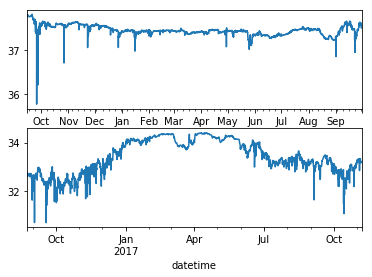

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=1)

plt.figure(1)
plt.subplot(211)
df1.sss.plot()

plt.subplot(212)
df2.sss.plot()

In [112]:
# finding the shape of our data
df1.values.shape

(9133, 8)

In [113]:
# finding the shape of our data
df2.values.shape

(10549, 8)

In [114]:
# Here we are adding a few other input-signals 
# to the data that may help our model in making predictions
# Day of the year and Hour
df2['Various', 'Day'] = df2.index.dayofyear
df2['Various', 'Hour'] = df2.index.hour
df2.head()

df1['Various', 'Day'] = df1.index.dayofyear
df1['Various', 'Hour'] = df1.index.hour
df1.head()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)"
datetime,,,,,,,,,,
2012-09-14 20:00:00,735126.854167,37.768,27.887,0.0,3.1715,-70.403,0.0,0.0,258,20
2012-09-14 21:00:00,735126.895833,37.767,27.794,0.0,3.5116,-78.652,0.0,0.0,258,21
2012-09-14 22:00:00,735126.937500,37.768,27.718,0.0,4.8705,-86.660,0.0,0.0,258,22
2012-09-14 23:00:00,735126.979167,37.769,27.651,0.0,4.5117,-89.874,0.0,0.0,258,23
2012-09-15 00:00:00,735127.020833,37.770,27.593,0.0,4.3185,-94.404,0.0,0.0,259,0


## Target data for prediction

In [115]:
# identifying the target - what we want to predict
target = ['sss', 'sst', 'precip']

The following is the number of time-steps that we will shift the target-data. Our data-set is resampled to have an observation for each hour, so there are 24 observations for 24 hours.

If we want to predict the weather 24 hours into the future, we shift the data 24 time-steps. If we want to predict the weather 7 days into the future, we shift the data 7 * 24 time-steps.


In [116]:
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.

In [117]:
df_targets = df2[target].shift(-shift_steps)

## Numpy arrays

We now convert the Pandas data-frames to NumPy arrays that can be input to the neural network. We also remove the last part of the numpy arrays, because the target-data has NaN for the shifted period, and we only want to have valid data and we need the same array-shapes for the input- and output-data.

In [118]:
# input-signals:
x_data = df2.values[0:-shift_steps]

In [119]:
print(type(x_data))
print('shape:', x_data.shape)

<class 'numpy.ndarray'>
shape: (10525, 10)


In [120]:
# output-signals (or target signals):
y_data = df_targets.values[:-shift_steps]


In [121]:
print(type(y_data))
print('shape:', y_data.shape)

<class 'numpy.ndarray'>
shape: (10525, 3)


In [122]:
# number of observations in the dataset:
num_data = len(x_data)
num_data

10525

In [123]:
# fraction of the data-set that will 
# be used for the training set:
train_split = 0.9

In [124]:
num_train = int(train_split * num_data)
print('number of obs in the training set: %d' % num_train)

number of obs in the training set: 9472


In [125]:
num_test = num_data - num_train
print('number of obs in the test set: %d' % num_test)

number of obs in the test set: 1053


In [126]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
print('number of input-signals for the training and test sets: %d' % (len(x_train) + len(x_test)))

number of input-signals for the training and test sets: 10525


In [127]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
print('number of output-signals for the training and test sets: %d' % (len(y_train) + len(y_test)))

number of output-signals for the training and test sets: 10525


In [128]:
num_x_signals = x_data.shape[1]
print('number of input-signals: %d' % num_x_signals)

number of input-signals: 10


In [129]:
num_y_signals = y_data.shape[1]
print('number of output-signals: %d' % num_y_signals)

number of output-signals: 3


## Scaled data

In [130]:
# The neural network works best on values roughly between -1 and 1, 
# so we need to scale the data before it is being input to the neural network
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -179.94
Max: 736960.729166667


In [131]:
# we first create a scalar-object for the input-signals
x_scaler = MinMaxScaler()

In [132]:
# We then detect the range of values from the training-data 
# and scale the training-data.
x_train_scaled = x_scaler.fit_transform(x_train)

In [133]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [134]:
# We use the same scaler-object for 
# the input-signals in the test-set.
x_test_scaled = x_scaler.transform(x_test)

In [135]:
# create a separate scaler-object for the target-data.
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Data generator

In [136]:
# array shapes of the input and output data:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(9472, 10)
(9472, 3)


In [137]:
# creating batches of shorter sub-sequences picked at random
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [138]:
batch_size = 256

We will use a sequence-length of 1344, which means that each random sequence contains observations for 8 weeks. One time-step corresponds to one hour, so 24 x 7 time-steps corresponds to a week, and 24 x 7 x 8 corresponds to 8 weeks.

In [139]:
sequence_length = 24 * 7 * 8
sequence_length

1344

In [140]:
# create batch generator
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [141]:
# test the generator
x_batch, y_batch = next(generator)

In [142]:
print(x_batch.shape)
print(y_batch.shape)

(256, 1344, 10)
(256, 1344, 3)


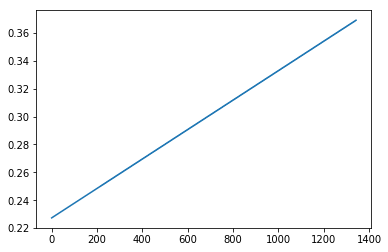

In [143]:
# plotting one of the 7 signals as an example:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

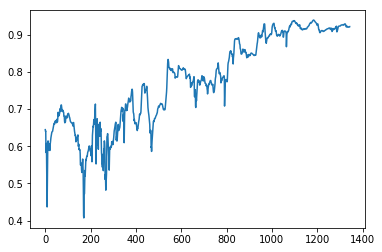

In [144]:
# plotting the output-signal
seq = y_batch[batch, :, signal]
plt.plot(seq)

### Validation set

The neural network trains quickly so we can easily run many training epochs. But then there is a risk of overfitting the model to the training-set so it does not generalize well to unseen data. We will therefore monitor the model's performance on the test-set after each epoch and only save the model's weights if the performance is improved on the test-set.

The batch-generator randomly selects a batch of short sequences from the training-data and uses that during training. But for the validation-data we will instead run through the entire sequence from the test-set and measure the prediction accuracy on that entire sequence.

In [145]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

## Create the Recurrent Neural Network

In [146]:
model = Sequential()

We can now add a Gated Recurrent Unit (GRU) to the network. This will have 512 outputs for each time-step in the sequence.

Note that because this is the first layer in the model, Keras needs to know the shape of its input, which is a batch of sequences of arbitrary length (indicated by None), where each observation has a number of input-signals (num_x_signals).


In [147]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

The GRU outputs a batch of sequences of 512 values. We want to predict 3 output-signals, so we add a fully-connected (or dense) layer which maps 512 values down to only 3 values.

The output-signals in the data-set have been limited to be between 0 and 1 using a scaler-object. So we also limit the output of the neural network using the Sigmoid activation function, which squashes the output to be between 0 and 1.


In [148]:
model.add(Dense(num_y_signals, activation='sigmoid'))

A problem with using the Sigmoid activation function, is that we can now only output values in the same range as the training-data.

For example, if the training-data only has temperatures between -20 and +30 degrees, then the scaler-object will map -20 to 0 and +30 to 1. So if we limit the output of the neural network to be between 0 and 1 using the Sigmoid function, this can only be mapped back to temperature values between -20 and +30.

We can use a linear activation function on the output instead. This allows for the output to take on arbitrary values. It might work with the standard initialization for a simple network architecture, but for more complicated network architectures e.g. with more layers, it might be necessary to initialize the weights with smaller values to avoid NaN values during training. You may need to experiment with this to get it working.


In [149]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

### Loss function

We will use Mean Squared Error (MSE) as the loss-function that will be minimized. This measures how closely the model's output matches the true output signals.

However, at the beginning of a sequence, the model has only seen input-signals for a few time-steps, so its generated output may be very inaccurate. Using the loss-value for the early time-steps may cause the model to distort its later output. We therefore give the model a "warmup-period" of 50 time-steps where we don't use its accuracy in the loss-function, in hope of improving the accuracy for later time-steps.

In [150]:
warmup_steps = 50

In [151]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

### Compile Model

In [152]:
# the optimizer and the beginning learning rate that we'll be using
optimizer = RMSprop(lr=1e-2)

In [153]:
# compile the Keras model so it's ready for training
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

This is a very small model with only two layers. The output shape of (None, None, 5) means that the model will output a batch with an arbitrary number of sequences, each of which has an arbitrary number of observations, and each observation has 5 signals. This corresponds to the 5 target signals we want to predict.


In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         803328    
_________________________________________________________________
dense_1 (Dense)              (None, None, 3)           1539      
Total params: 804,867
Trainable params: 804,867
Non-trainable params: 0
_________________________________________________________________


### Callback functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.

This is the callback for writing checkpoints during training.

In [155]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [156]:
# This is the callback for stopping the optimization when performance worsens on the validation-set.
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [157]:
# This is the callback for writing the TensorBoard log during training.
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by patience=0). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-3 above, so multiplying it by 0.1 gives a learning-rate of 1e-4. We don't want the learning-rate to go any lower than this.

In [158]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-3,
                                       patience=0,
                                       verbose=1)

In [159]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

## Train the RNN

We can now train the neural network.

Note that a single "epoch" does not correspond to a single processing of the training-set, because of how the batch-generator randomly selects sub-sequences from the training-set. Instead we have selected steps_per_epoch so that one "epoch" is processed in a few minutes.

With these settings, each "epoch" took about 2.5 minutes to process on a GTX 1070. After 14 "epochs" the optimization was stopped because the validation-loss had not decreased for 5 "epochs". This optimization took about 35 minutes to finish.

Also note that the loss sometimes becomes NaN (not-a-number). This is often resolved by restarting and running the Notebook again. But it may also be caused by your neural network architecture, learning-rate, batch-size, sequence-length, etc. in which case you may have to modify those settings.

In [160]:
# first, make sure the model is tranable. Looks like it is.
model.trainable

True

In [161]:
'''
%%time
model.fit_generator(generator=generator,
                    epochs=5,
                    steps_per_epoch=20,
                    validation_data=validation_data,
                    callbacks=callbacks,
                    workers=50,
                    max_queue_size=8)
'''

'\n%%time\nmodel.fit_generator(generator=generator,\n                    epochs=5,\n                    steps_per_epoch=20,\n                    validation_data=validation_data,\n                    callbacks=callbacks,\n                    workers=50,\n                    max_queue_size=8)\n'

### Load Checkpoint

Because we use early-stopping when training the model, it is possible that the model's performance has worsened on the test-set for several epochs before training was stopped. We therefore reload the last saved checkpoint, which should have the best performance on the test-set.

In [162]:
'''
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)
'''

'\ntry:\n    model.load_weights(path_checkpoint)\nexcept Exception as error:\n    print("Error trying to load checkpoint.")\n    print(error)\n'

## Performance on test set

In [163]:
# expand array dimensionality to create a batch with the one sequence
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 2s 2s/step


In [164]:
print("loss (test-set):", result)

loss (test-set): 0.10941273719072342


In [165]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

## Generate predictions

In [166]:
# helper function plots the predicted and true output-signals
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
#     print(y_pred[0])
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
#     print(y_pred_rescaled.shape)
    # For each output-signal.
    for signal in range(len(target)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
#         print(signal)
#         print(signal_pred)
        
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target[signal])
        plt.legend()
        plt.show()

Below, the results are very skewed from the initial results - I changed the parameters of the model and have yet to rerun the initial state. The graphs below can be ignored.

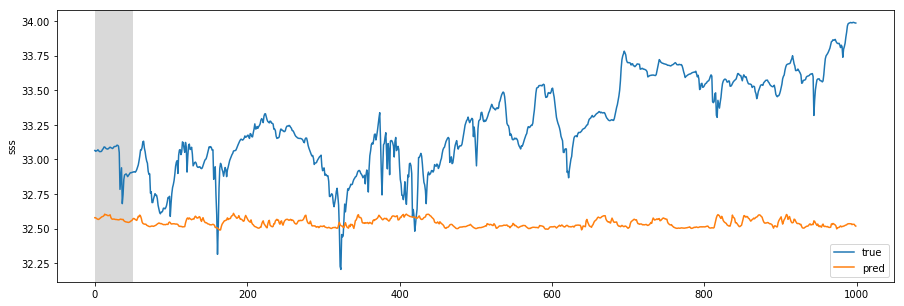

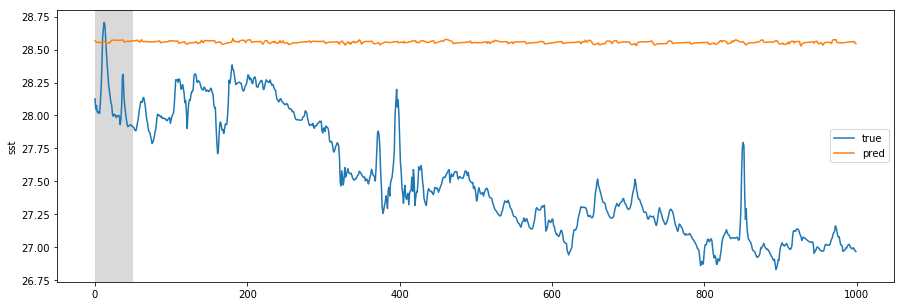

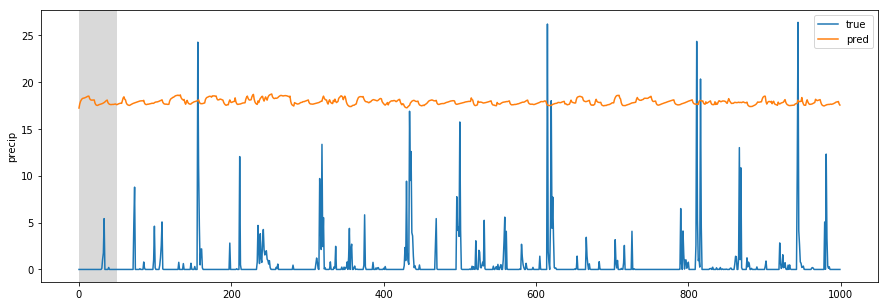

In [167]:
plot_comparison(start_idx=2000, length=1000, train=True)

## Example from test set

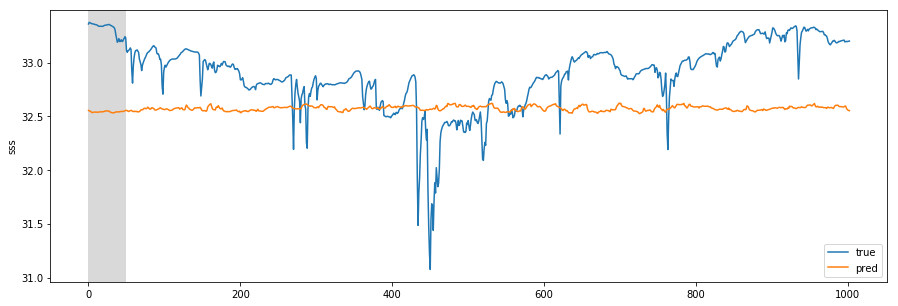

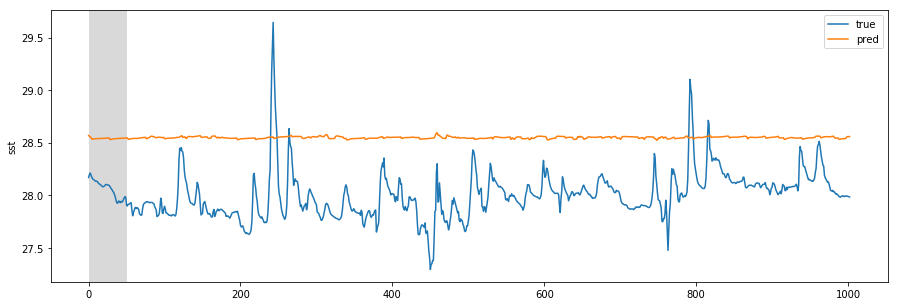

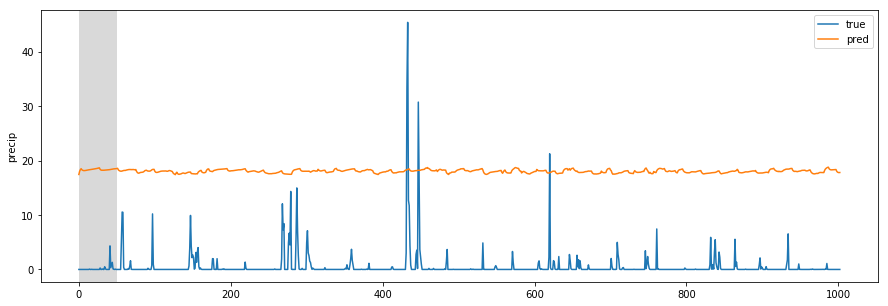

In [168]:
plot_comparison(start_idx=50, length=2000, train=False)

## Conclusion

The time series algorithm worked reasonably well for predicting both sss and sst. However, predicting precip proved to be a little bit less fruitful - at least with our current parameters. I theorize that we see a discrepancy between the true and predicted trend lines because the training algorithm interprets each of the substantial rain events, seen as large peaks on the plot, as anomalies. 

Progressing forward, I do believe that this is a method that could work for us. The reason that salinity doesn't seem to have a high significance is because the minimal changes in sss might be read as insignificant - however, in reality, microscopic changes in salinity are very valuable. I would like to try this again by creating a scaled column for salinity.

# Some other stuff

In [169]:
df2['sss_diff'], df2['precip_diff']  = df2['sss'].diff(), df2['precip'].diff()
df2 = df2.fillna(0)
df2.head()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)",sss_diff,precip_diff
datetime,,,,,,,,,,,,
2016-08-24 02:00:00,736566.104167,32.786,29.973,0.000,1.4993,-35.280,0.000,0.0,237,2,0.000,0.000
2016-08-24 03:00:00,736566.145833,32.790,30.089,0.000,2.2012,-44.300,0.000,0.0,237,3,0.004,0.000
2016-08-24 04:00:00,736566.187500,32.628,29.630,10.613,4.6946,-80.636,10.613,0.0,237,4,-0.162,10.613
2016-08-24 05:00:00,736566.229167,32.606,29.367,1.210,1.3395,141.610,11.823,0.0,237,5,-0.022,-9.403
2016-08-24 06:00:00,736566.270833,32.607,29.310,0.000,1.8056,100.850,11.823,0.0,237,6,0.001,-1.210


In [170]:
df2.corr()

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)",sss_diff,precip_diff
time,1.000000,0.198050,0.246370,-0.016691,-0.084186,0.009089,-0.021917,-0.026306,-0.049838,0.000151,-0.002811,-0.000060
sss,0.198050,1.000000,-0.452434,-0.160745,0.424844,-0.572238,-0.223558,-0.262026,-0.766898,0.003643,0.037036,0.015475
sst,0.246370,-0.452434,1.000000,0.012091,-0.451183,0.363262,0.005854,0.005522,0.435396,0.015443,0.006163,0.009997
precip,-0.016691,-0.160745,0.012091,1.000000,-0.043303,0.088515,0.723873,0.534377,0.094682,-0.005808,-0.434577,0.527998
wind_spd,-0.084186,0.424844,-0.451183,-0.043303,1.000000,-0.303017,-0.057860,-0.060240,-0.398996,0.008720,0.048031,0.005204
wind_dir,0.009089,-0.572238,0.363262,0.088515,-0.303017,1.000000,0.118139,0.154891,0.462655,0.017422,-0.004844,0.002104
cum_precip3,-0.021917,-0.223558,0.005854,0.723873,-0.057860,0.118139,1.000000,0.803213,0.124906,-0.006775,-0.250909,-0.098775
cum_precip6,-0.026306,-0.262026,0.005522,0.534377,-0.060240,0.154891,0.803213,1.000000,0.155375,-0.003197,-0.058981,-0.092024
"(Various, Day)",-0.049838,-0.766898,0.435396,0.094682,-0.398996,0.462655,0.124906,0.155375,1.000000,-0.000893,0.004151,-0.000080
"(Various, Hour)",0.000151,0.003643,0.015443,-0.005808,0.008720,0.017422,-0.006775,-0.003197,-0.000893,1.000000,-0.003212,0.001781


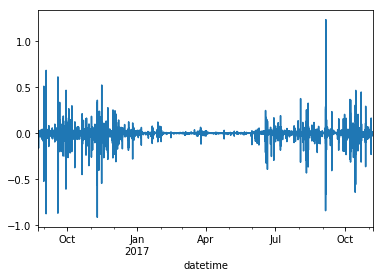

In [171]:
df2['sss_diff'].plot()

In [172]:
# The neural network works best on values roughly between -1 and 1, 
# so we need to scale the data before it is being input to the neural network
print("Min (sss_diff):", np.min(df2['sss_diff']))
print("Max (sss_diff):", np.max(df2['sss_diff']))
print("Min (precip_diff):", np.min(df2['precip_diff']))
print("Max (precip_diff):", np.max(df2['precip_diff']))

Min (sss_diff): -0.9119999999999955
Max (sss_diff): 1.2310000000000016
Min (precip_diff): -32.702
Max (precip_diff): 32.83857999999999


In [173]:
# we first create a scalar-object for the input-signals
scaler = MinMaxScaler()

In [174]:
scaled_df2 = scaler.fit_transform(df2[['sss_diff', 'precip_diff']])

In [175]:
df2['scaled_sss_diff'] = np.squeeze(scaled_df2[:, :1].tolist())
df2['scaled_precip_diff'] = np.squeeze(scaled_df2[:, 1:].tolist())

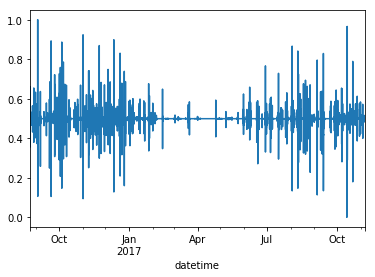

In [176]:
df2['scaled_precip_diff'].plot()

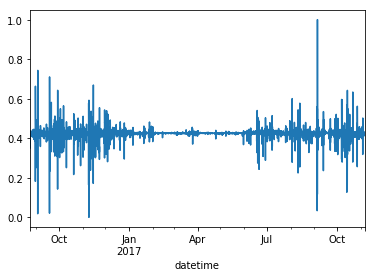

In [177]:
df2['scaled_sss_diff'].plot()

In [178]:
df2.head(3)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)",sss_diff,precip_diff,scaled_sss_diff,scaled_precip_diff
datetime,,,,,,,,,,,,,,
2016-08-24 02:00:00,736566.104167,32.786,29.973,0.000,1.4993,-35.280,0.000,0.0,237,2,0.000,0.000,0.425572,0.498958
2016-08-24 03:00:00,736566.145833,32.790,30.089,0.000,2.2012,-44.300,0.000,0.0,237,3,0.004,0.000,0.427438,0.498958
2016-08-24 04:00:00,736566.187500,32.628,29.630,10.613,4.6946,-80.636,10.613,0.0,237,4,-0.162,10.613,0.349977,0.660888


#  ROC Curve vs. Precision-Recall Curve


* ROC curves should be used when there are roughly equal numbers of observations for each class.
* Precision-Recall curves should be used when there is a moderate to large class imbalance.


In [179]:
rain_event = [1 if i>=2.0 else 0 for i in df2['cum_precip3']]
df2['rain_event'] = rain_event
df2.head(3)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)",sss_diff,precip_diff,scaled_sss_diff,scaled_precip_diff,rain_event
datetime,,,,,,,,,,,,,,,
2016-08-24 02:00:00,736566.104167,32.786,29.973,0.000,1.4993,-35.280,0.000,0.0,237,2,0.000,0.000,0.425572,0.498958,0
2016-08-24 03:00:00,736566.145833,32.790,30.089,0.000,2.2012,-44.300,0.000,0.0,237,3,0.004,0.000,0.427438,0.498958,0
2016-08-24 04:00:00,736566.187500,32.628,29.630,10.613,4.6946,-80.636,10.613,0.0,237,4,-0.162,10.613,0.349977,0.660888,1


In [180]:
df2.iloc[:,:12].head(1)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,"(Various, Day)","(Various, Hour)",sss_diff,precip_diff
datetime,,,,,,,,,,,,
2016-08-24 02:00:00,736566.104167,32.786,29.973,0.0,1.4993,-35.28,0.0,0.0,237,2,0.0,0.0


In [181]:
df2.iloc[:,-1:].head(1)

,rain_event
datetime,
2016-08-24 02:00:00,0


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

X = df2.iloc[:,:12]
y = df2['rain_event']

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 400 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# K-Nearest Neighbors

## More variables to SPURS2 dataset

In [243]:
spurs2.head(3)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6
datetime,,,,,,,,
2016-08-24 02:30:00.000027,736566.104167,32.786,29.973,0.000,1.4993,-35.280,0.000,0.0
2016-08-24 03:29:59.999973,736566.145833,32.790,30.089,0.000,2.2012,-44.300,0.000,0.0
2016-08-24 04:30:00.000000,736566.187500,32.628,29.630,10.613,4.6946,-80.636,10.613,0.0


In [244]:
spurs2['year'] = pd.DatetimeIndex(spurs2.index).year
spurs2['month'] = pd.DatetimeIndex(spurs2.index).month
spurs2['day'] = pd.DatetimeIndex(spurs2.index).day
spurs2['hour'] = pd.DatetimeIndex(spurs2.index).hour

In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

sc = StandardScaler()

spurs2['pct_change'] = spurs2['sss'].pct_change()
spurs2['sst_change'] = spurs2['sst'].pct_change()
spurs2['spd_change'] = spurs2['wind_spd'].pct_change()
spurs2['dir_change'] = spurs2['wind_dir'].pct_change()

scaled = sc.fit_transform(spurs2['sss'].values.reshape(-1,1))
scaled2 = sc.fit_transform(spurs2['sst'].values.reshape(-1,1))
scaled3 = sc.fit_transform(spurs2['wind_spd'].values.reshape(-1,1))
scaled4 = sc.fit_transform(spurs2['wind_dir'].values.reshape(-1,1))
spurs2['scaled_sss'] = scaled
spurs2['scaled_sst'] = scaled2
spurs2['scaled_spd'] = scaled3
spurs2['scaled_dir'] = scaled4

scaled5 = scale(spurs2['pct_change'])
scaled6 = scale(spurs2['spd_change'])
scaled7 = scale(spurs2['dir_change'])
scaled8 = scale(spurs2['sst_change'])
spurs2['pct_c_scaled'] = scaled5
spurs2['pct_sst_scaled'] = scaled8
spurs2['pct_spd_scaled'] = scaled6
spurs2['pct_dir_scaled'] = scaled7

spurs2['year'] = pd.DatetimeIndex(spurs2.index).year
spurs2['month'] = pd.DatetimeIndex(spurs2.index).month
spurs2['day'] = pd.DatetimeIndex(spurs2.index).day
spurs2['hour'] = pd.DatetimeIndex(spurs2.index).hour

In [246]:
spurs2 = spurs2.fillna(0)
spurs2.head(1)

,time,sss,sst,precip,wind_spd,wind_dir,cum_precip3,cum_precip6,year,month,...,spd_change,dir_change,scaled_sss,scaled_sst,scaled_spd,scaled_dir,pct_c_scaled,pct_sst_scaled,pct_spd_scaled,pct_dir_scaled
datetime,,,,,,,,,,,,,,,,,,,,,
2016-08-24 02:30:00.000027,736566.104167,32.786,29.973,0.0,1.4993,-35.28,0.0,0.0,2016,8,...,0.0,0.0,-0.95113,3.414139,-1.89932,0.085196,0.0,0.0,0.0,0.0


## Building the model

In [247]:
from sklearn.model_selection import train_test_split

X = spurs2.loc[:, ['scaled_sst', 'scaled_spd', 'scaled_dir', 'pct_c_scaled']]
y = [1 if i > 2.0 else 0 for i in df2['cum_precip3']]
y = pd.DataFrame(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size = 0.3, random_state = 0)

In [248]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [249]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
parameters = [{'n_neighbors': [1, 2, 3, 5, 10], 'algorithm': ['brute'], 'p': [1, 2], 'n_jobs': [1]},
              {'n_neighbors': [1, 2, 3, 5, 10], 'algorithm': ['auto'], 'p': [1, 2], 'n_jobs': [1]}]
grid_search = GridSearchCV(estimator = knn, param_grid = parameters,
                           scoring = 'recall', cv =10 , n_jobs = 1)
grid_search = grid_search.fit(X_train, y_train)

In [250]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)
print(grid_search.best_estimator_)

0.37187036595525014
{'algorithm': 'brute', 'n_jobs': 1, 'n_neighbors': 1, 'p': 1}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')


In [251]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
knn.fit(X, y)
scores=cross_val_score(knn, X_train, y_train, cv=4, scoring="recall")
print("scores", scores)
print("Recall: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\jdb3750\AppData\Local\Continuum\anaconda2\envs\ML\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


scores [0.38071066 0.36040609 0.34010152 0.37563452]
Recall: 0.3642 (+/- 0.03)


In [252]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
y_pred2 = knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_train, y_pred2)
print(cm)
print()
print(cm2)

[[2822    0]
 [   0  343]]

[[6596    0]
 [   0  788]]


In [230]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2822
           1       1.00      1.00      1.00       343

   micro avg       1.00      1.00      1.00      3165
   macro avg       1.00      1.00      1.00      3165
weighted avg       1.00      1.00      1.00      3165

